In [2]:
pip install --upgrade fosforml

     |████████████████████████████████| 51kB 5.1MB/s eta 0:00:011
     |████████████████████████████████| 1.9MB 8.4MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 40.7MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 62.8MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 126kB/s s eta 0:00:01                         | 25.7MB 68.6MB/s eta 0:00:03
     |████████████████████████████████| 133kB 103.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 27.0MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 65.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 24.4MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 308kB/s  eta 0:00:01
     |████████████████████████████████| 51kB 19.5MB/s eta 0:00:01
     |████████████████████████████████| 174kB 102.0MB/s eta 0:00:01
     |████████████████████████████████| 39.9MB 63.6MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 62.0MB/s eta 0:00:01
    

In [35]:
pip install seaborn

     |████████████████████████████████| 296kB 6.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import fosforml
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [4]:
my_session.connection.database

'ASSORTMENT_PLANNING'

In [5]:
my_session.connection.schema

'CPG_BRONZE'

In [6]:
table_name = "ASSORTMENT_PLANNING.CPG_BRONZE.SALES_CLEAN"

In [7]:
sf_df = my_session.sql("select * from {}".format(table_name))

In [8]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [9]:
df=sf_df.to_pandas()

In [10]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df=df.sort_values(by='TRANS_DATE')

In [20]:
df.head(5)

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
804225,202309,2023-08-29,2023-08-28,518.18,3,0.001125,518.181818,202209,DB0209,OL32665,Florence,Arizona,City Center,Str1,PRD0059,Perfume and Deodrants,Male Deodrant,Sapphire
765439,202309,2023-08-29,2023-08-28,140.00,16,0.000448,142.857143,202209,DB0209,OL49699,Phoenix,Arizona,Dolphin,Str1,PRD0094,Perfume and Deodrants,Unisex Perfume,Mocha
765438,202309,2023-08-29,2023-08-28,137.14,16,0.000272,142.857143,202209,DB0209,OL48766,Ashland,Kentucky,Dolphin,Str2,PRD0028,Soap,Toilet Soap,Indigo
765437,202309,2023-08-29,2023-08-28,159.09,1,0.000240,159.090909,202209,DB0706,OL160684,Plano,Texas,City Center,Str2,PRD0125,Lotion,Head Lotion,Burgundy
316878,202309,2023-08-29,2023-08-28,52.50,12,0.000132,53.571429,202209,DB0655,OL175633,Puyallup,Washington,Santa Cruz,Str5,PRD0105,Perfume and Deodrants,Female Perfume,Garnet


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966400 entries, 804225 to 360638
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MNTH_CODE         966400 non-null  int32  
 1   TRANS_DATE        966400 non-null  object 
 2   START_DATE        966400 non-null  object 
 3   SALES_VALUE       966400 non-null  float64
 4   SALES_UNITS       966400 non-null  int16  
 5   SALES_VOLUME      966400 non-null  float64
 6   SALES_PTR_VALUE   966400 non-null  float64
 7   OC_CODE           966400 non-null  int32  
 8   DISTRIBUTOR_CODE  966400 non-null  object 
 9   OUTLET_CODE       966400 non-null  object 
 10  CITY              966400 non-null  object 
 11  STATE             966400 non-null  object 
 12  COUNTY            966400 non-null  object 
 13  STREET            966400 non-null  object 
 14  PRODUCT_CODE      966400 non-null  object 
 15  CATEGORY          966400 non-null  object 
 16  SUBCATEGORY       96

In [23]:
#Converting into datetime format

df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [25]:
df.shape

(966400, 18)

Clustering the Objects

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Convert TRANS_DATE and START_DATE to datetime format
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Create additional features
df['Days_Between_Transactions'] = df.groupby('OUTLET_CODE')['TRANS_DATE'].diff().dt.days

# Aggregate sales units by category
sales_units_by_category = df.pivot_table(index='OUTLET_CODE', columns='CATEGORY', values='SALES_UNITS', aggfunc='sum', fill_value=0).reset_index()

# Aggregate other features
other_features = df.groupby('OUTLET_CODE').agg({
    'TRANS_DATE': ['count', 'nunique'],
    'Days_Between_Transactions': 'mean'
}).reset_index()

other_features.columns = ['OUTLET_CODE', 'Num_Transactions', 'Unique_Transaction_Days', 'Avg_Days_Between_Transactions']

# Merge the features
store_features = pd.merge(sales_units_by_category, other_features, on='OUTLET_CODE')

# Normalize the features
scaler = StandardScaler()
store_features_scaled = scaler.fit_transform(store_features.drop('OUTLET_CODE', axis=1))

In [51]:
store_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18833 entries, 0 to 18832
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OUTLET_CODE                    18833 non-null  object 
 1   Dental                         18833 non-null  int64  
 2   Hair Care                      18833 non-null  int64  
 3   Kids Care                      18833 non-null  int64  
 4   Lotion                         18833 non-null  int64  
 5   Perfume and Deodrants          18833 non-null  int64  
 6   Soap                           18833 non-null  int64  
 7   Wipes                          18833 non-null  int64  
 8   Num_Transactions               18833 non-null  int64  
 9   Unique_Transaction_Days        18833 non-null  int64  
 10  Avg_Days_Between_Transactions  18451 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 1.6+ MB


In [56]:
# Determine the optimal number of clusters using the elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(store_features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
# Based on the elbow plot, choose the optimal number of clusters 
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
store_features['Cluster'] = kmeans.fit_predict(store_features_scaled)

In [30]:
# Display the clustered DataFrame
store_features.head()

,OUTLET_CODE,Total_Sales_Value,Avg_Sales_Value,Total_Sales_Units,Avg_Sales_Units,Total_Sales_Volume,Avg_Sales_Volume,Total_Sales_PTR_Value,Avg_Sales_PTR_Value,Num_Transactions,Sales_Frequency,Cluster
0,OL10328,4904.27,144.243235,221,6.500000,0.009587,0.000282,4974.675325,146.313980,34,10,0
1,OL10329,42893.83,219.968359,1148,5.887179,0.072044,0.000369,43805.389611,224.643024,195,37,0
2,OL10330,324169.05,565.740052,3124,5.452007,0.623779,0.001089,331764.545450,578.995716,573,32,1
3,OL10331,12422.54,253.521224,87,1.775510,0.030265,0.000618,12493.636364,254.972171,49,16,0
4,OL10332,36331.30,247.151701,4204,28.598639,0.101504,0.000691,37282.142859,253.620019,147,20,0


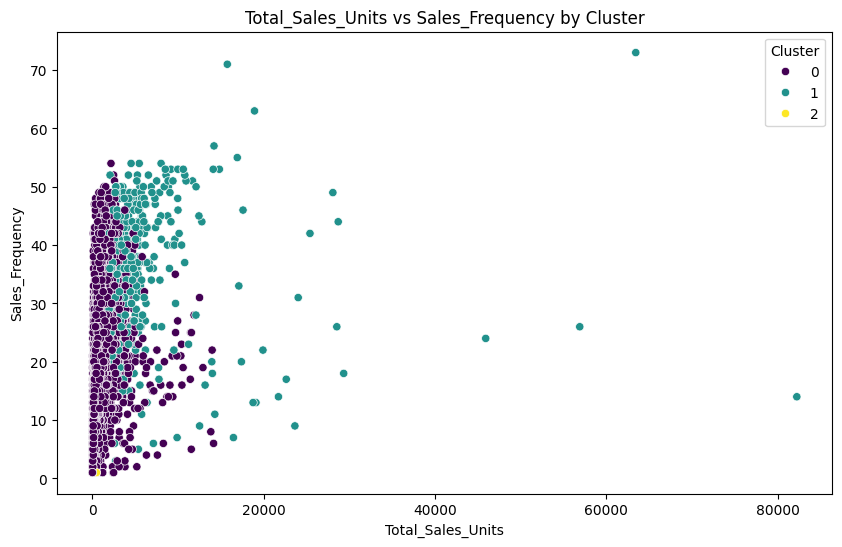

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Sales Value vs Sales Volume colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Sales_Units', y='Sales_Frequency', hue='Cluster', data=store_features, palette='viridis')
plt.title('Total_Sales_Units vs Sales_Frequency by Cluster')
plt.xlabel('Total_Sales_Units')
plt.ylabel('Sales_Frequency')
plt.legend(title='Cluster')
plt.show()

In [39]:
import pandas as pd

# Assuming your DataFrame is named store_features and it contains the 'Cluster' column
# Count the number of outlets in each cluster
outlet_counts = store_features['Cluster'].value_counts().reset_index()
outlet_counts.columns = ['Cluster', 'Number_of_Outlets']

# Display the number of outlets in each cluster
print(outlet_counts)

   Cluster  Number_of_Outlets
0        0              18424
1        1                408
2        2                  1
